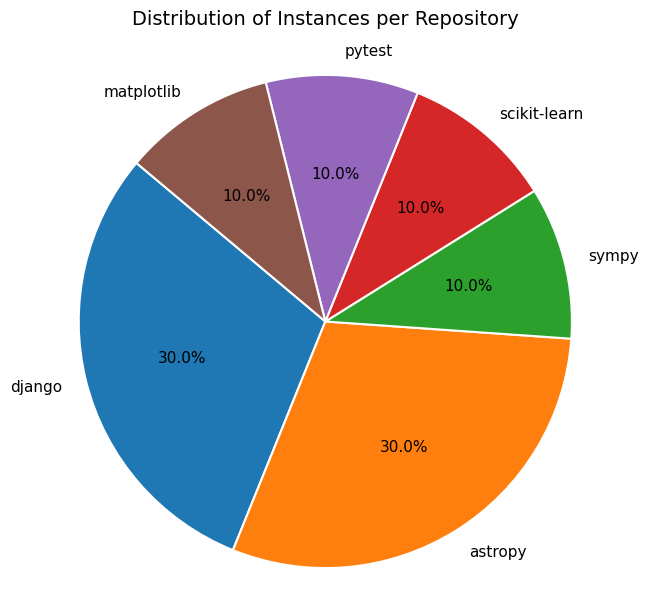

In [ ]:
import matplotlib.pyplot as plt

# Data
repositories = ['astropy', 'django', 'scikit-learn', 'pytest', 'matplotlib', 'sympy']
instance_counts = [3, 3, 1, 1, 1, 1]

# Sort repositories by count descending
sorted_data = sorted(zip(instance_counts, repositories), reverse=True)
instance_counts_sorted, repositories_sorted = zip(*sorted_data)

# Use an existing matplotlib palette (tab10)
colors = plt.get_cmap('tab10').colors[:len(repositories_sorted)]

# Create pie chart
plt.figure(figsize=(7, 7))
plt.pie(
    instance_counts_sorted,
    labels=repositories_sorted,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    textprops={'fontsize': 11},
    wedgeprops={'edgecolor': 'white', 'linewidth': 1.5}
)

# Title
plt.title('Distribution of Instances per Repository', fontsize=14, pad=20)

# Equal aspect ratio ensures pie chart is circular
plt.axis('equal')
plt.savefig("repository_distribution.pdf", format='pdf', bbox_inches='tight')
# Display chart
plt.show()


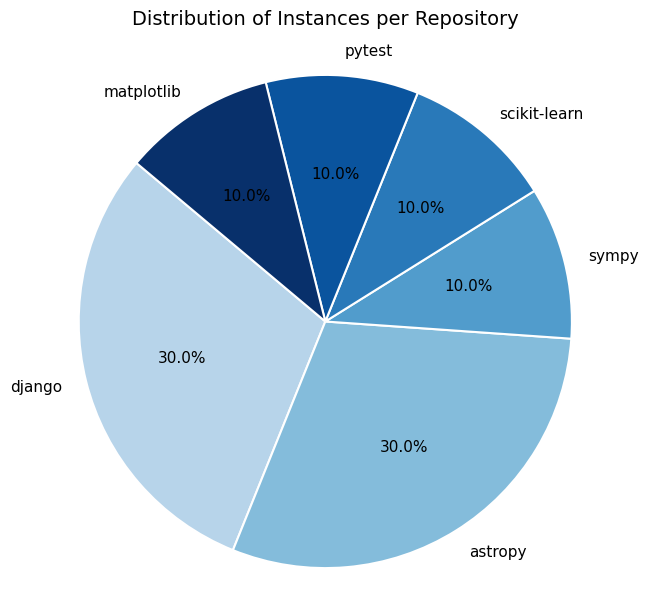

In [10]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Data
repositories = ['astropy', 'django', 'scikit-learn', 'pytest', 'matplotlib', 'sympy']
instance_counts = [3, 3, 1, 1, 1, 1]

# Sort repositories by count descending
sorted_data = sorted(zip(instance_counts, repositories), reverse=True)
instance_counts_sorted, repositories_sorted = zip(*sorted_data)

# Create shades of blue using matplotlib colormap
cmap = plt.get_cmap('Blues')  # Blues colormap
# Generate evenly spaced colors from the colormap
colors = [cmap(0.3 + 0.7*i/(len(repositories_sorted)-1)) for i in range(len(repositories_sorted))]

# Create pie chart
plt.figure(figsize=(7, 7))
plt.pie(
    instance_counts_sorted,
    labels=repositories_sorted,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    textprops={'fontsize': 11},
    wedgeprops={'edgecolor': 'white', 'linewidth': 1.5}
)

# Title
plt.title('Distribution of Instances per Repository', fontsize=14, pad=20)

# Equal aspect ratio ensures pie chart is circular
plt.axis('equal')

# Display chart
plt.show()


/tmp/ipython-input-3634352054.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Type', y='Cost', data=df_long, palette=['#A8D5BA','#F7A8A8'])


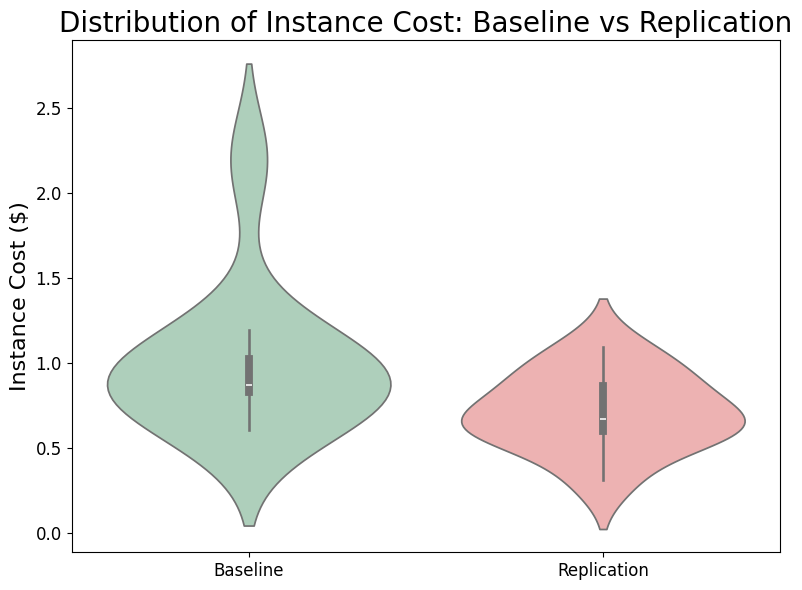

In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your CSV
df = pd.read_csv("/content/analysis.csv")  # adjust separator if needed

# Prepare data in long format for easier plotting
df_long = df.melt(id_vars=['instance_id'],
                  value_vars=['instance_cost_org', 'instance_cost_rep'],
                  var_name='Type', value_name='Cost')

# Rename for clarity
df_long['Type'] = df_long['Type'].replace({
    'instance_cost_org': 'Baseline',
    'instance_cost_rep': 'Replication'
})

# Create violin plot
plt.figure(figsize=(8,6))
sns.violinplot(x='Type', y='Cost', data=df_long, palette=['#A8D5BA','#F7A8A8'])
# sns.stripplot(x='Type', y='Cost', data=df_long, color='k', alpha=0.5, jitter=True)  # optional: show points

plt.title('Distribution of Instance Cost: Baseline vs Replication',fontsize=20)
plt.ylabel('Instance Cost ($)',fontsize=16)
plt.xlabel('',fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

# Save figure
plt.savefig("cost_distribution.pdf")
plt.show()


In [30]:
df.head()

,instance_id,instance_cost_org,tokens_sent_org,tokens_received_org,api_calls_org,patch_org,instance_cost_rep,tokens_sent_rep,tokens_received_rep,api_calls_rep,start_time_rep,finish_time_rep,patch_rep
0,astropy__astropy-12907,0.900303,38214,1578,48,diff --git a/astropy/modeling/separable.py b/a...,0.600997,764258,1435,37,"2025-10-20 19:34:28,695","2025-10-20 19:40:14,919",diff --git a/astropy/modeling/separable.py b/a...
1,astropy__astropy-14182,0.713035,22600,1980,56,diff --git a/astropy/io/ascii/rst.py b/astropy...,0.596956,820716,2151,51,"2025-10-20 18:26:41,941","2025-10-20 18:33:01,698",diff --git a/astropy/io/ascii/rst.py b/astropy...
2,astropy__astropy-14995,0.990614,41812,1715,54,diff --git a/src/_pytest/_code/source.py b/src...,0.673011,955122,1759,45,"2025-10-20 19:53:30,199","2025-10-20 20:00:48,929",diff --git a/astropy/nddata/mixins/ndarithmeti...
3,django__django-10914,1.036511,32787,2500,53,diff --git a/django/conf/global_settings.py b/...,1.091795,1622481,1919,58,"2025-10-20 20:09:40,727","2025-10-20 20:17:31,106",diff --git a/django/conf/global_settings.py b/...
4,django__django-11099,1.191213,39296,2064,58,diff --git a/django/contrib/auth/validators.py...,0.962296,1520534,2290,58,"2025-10-20 18:02:24,003","2025-10-20 18:10:52,608",diff --git a/django/contrib/auth/validators.py...


/tmp/ipython-input-209905997.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Type', y='Tokens Sent', data=df_long, palette=['#A8D5BA','#F7A8A8'])


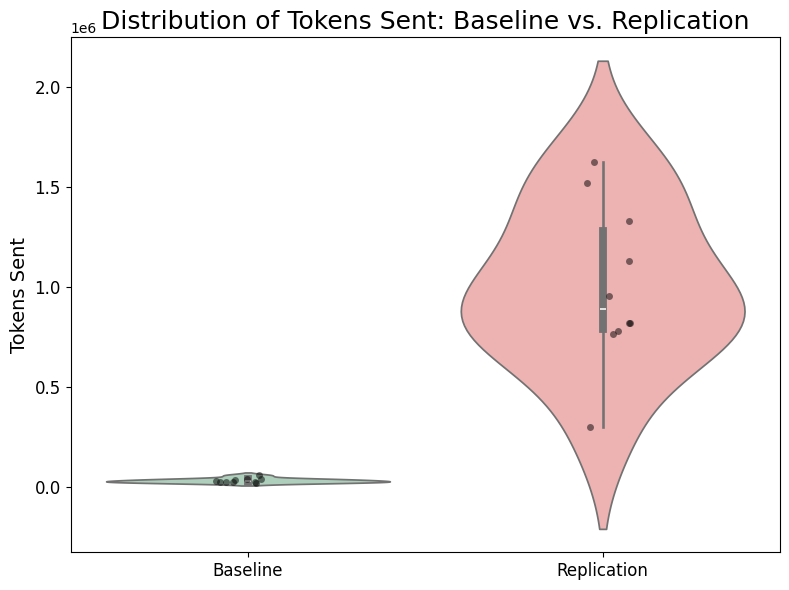

In [60]:
  # Select the relevant columns and melt to long format
df_long = df.melt(id_vars=['instance_id'],
                  value_vars=['tokens_sent_org', 'tokens_sent_rep'],
                  var_name='Type', value_name='Tokens Sent')

# Rename for clarity
df_long['Type'] = df_long['Type'].replace({
    'tokens_sent_org': 'Baseline',
    'tokens_sent_rep': 'Replication'
})

# Create violin plot
plt.figure(figsize=(8,6))
sns.violinplot(x='Type', y='Tokens Sent', data=df_long, palette=['#A8D5BA','#F7A8A8'])
sns.stripplot(x='Type', y='Tokens Sent', data=df_long, color='k', alpha=0.5, jitter=True)  # optional points

# Increase font size
plt.title('Distribution of Tokens Sent: Baseline vs. Replication', fontsize=18)
plt.xlabel('', fontsize=14)
plt.ylabel('Tokens Sent', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

plt.tight_layout()
plt.savefig("tokens_sent_distribution.pdf")
plt.show()

/tmp/ipython-input-1363552101.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Type', y='Tokens Received', data=df_long, palette=['#A8D5BA','#F7A8A8'])


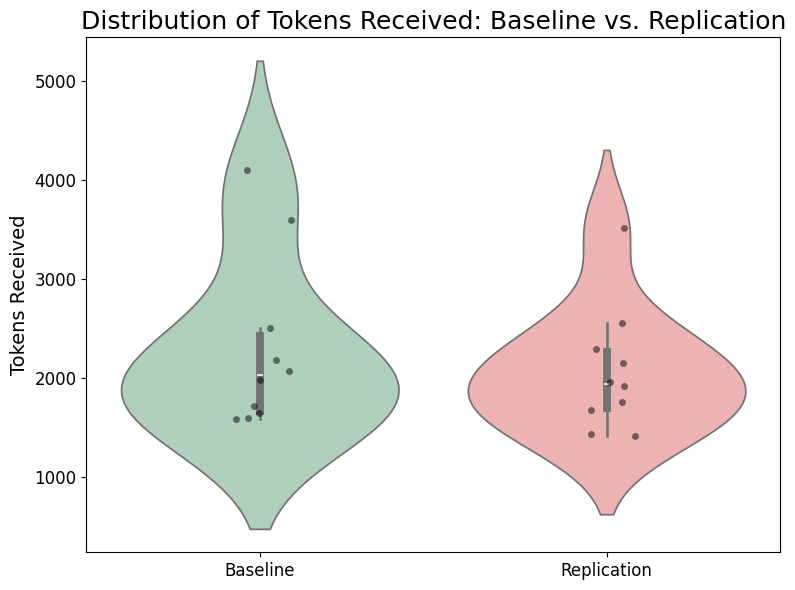

In [59]:
# Melt tokens_received_org and tokens_received_rep
df_long = df.melt(id_vars=['instance_id'],
                  value_vars=['tokens_received_org', 'tokens_received_rep'],
                  var_name='Type', value_name='Tokens Received')

# Rename for clarity
df_long['Type'] = df_long['Type'].replace({
    'tokens_received_org': 'Baseline',
    'tokens_received_rep': 'Replication'
})

# Create violin plot
plt.figure(figsize=(8,6))
sns.violinplot(x='Type', y='Tokens Received', data=df_long, palette=['#A8D5BA','#F7A8A8'])
sns.stripplot(x='Type', y='Tokens Received', data=df_long, color='k', alpha=0.5, jitter=True)

plt.title('Distribution of Tokens Received: Baseline vs. Replication', fontsize=18)
plt.xlabel('', fontsize=14)
plt.ylabel('Tokens Received', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

plt.tight_layout()
plt.savefig("tokens_received_distribution.pdf")
plt.show()


/tmp/ipython-input-1859373986.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Type', y='API Calls', data=df_long, palette=['#A8D5BA','#F7A8A8'])


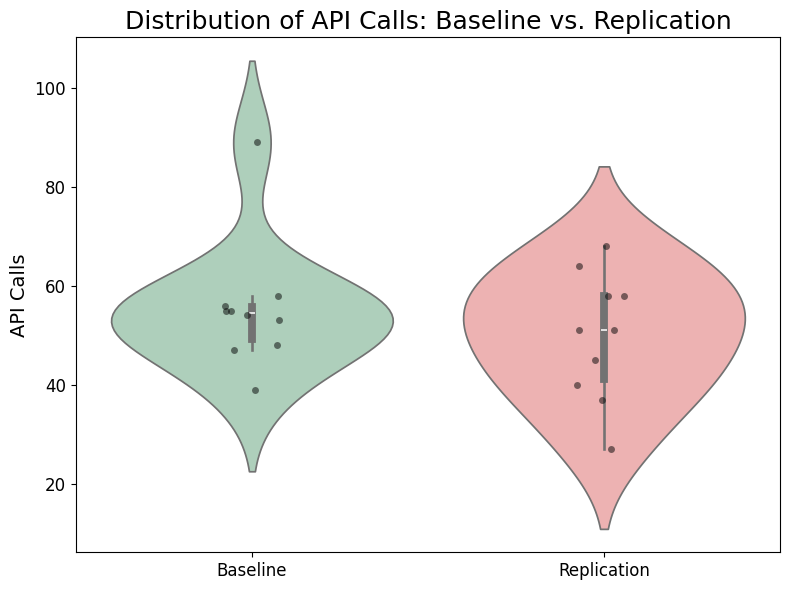

In [58]:
# Melt api_calls_org and api_calls_rep
df_long = df.melt(id_vars=['instance_id'],
                  value_vars=['api_calls_org', 'api_calls_rep'],
                  var_name='Type', value_name='API Calls')

# Rename for clarity
df_long['Type'] = df_long['Type'].replace({
    'api_calls_org': 'Baseline',
    'api_calls_rep': 'Replication'
})

# Create violin plot
plt.figure(figsize=(8,6))
sns.violinplot(x='Type', y='API Calls', data=df_long, palette=['#A8D5BA','#F7A8A8'])
sns.stripplot(x='Type', y='API Calls', data=df_long, color='k', alpha=0.5, jitter=True)

plt.title('Distribution of API Calls: Baseline vs. Replication', fontsize=18)
plt.xlabel('', fontsize=14)
plt.ylabel('API Calls', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

plt.tight_layout()
plt.savefig("api_calls_distribution.pdf")
plt.show()


In [39]:
df.head()

,instance_id,instance_cost_org,tokens_sent_org,tokens_received_org,api_calls_org,patch_org,instance_cost_rep,tokens_sent_rep,tokens_received_rep,api_calls_rep,start_time_rep,finish_time_rep,patch_rep
0,astropy__astropy-12907,0.900303,38214,1578,48,diff --git a/astropy/modeling/separable.py b/a...,0.600997,764258,1435,37,"2025-10-20 19:34:28,695","2025-10-20 19:40:14,919",diff --git a/astropy/modeling/separable.py b/a...
1,astropy__astropy-14182,0.713035,22600,1980,56,diff --git a/astropy/io/ascii/rst.py b/astropy...,0.596956,820716,2151,51,"2025-10-20 18:26:41,941","2025-10-20 18:33:01,698",diff --git a/astropy/io/ascii/rst.py b/astropy...
2,astropy__astropy-14995,0.990614,41812,1715,54,diff --git a/src/_pytest/_code/source.py b/src...,0.673011,955122,1759,45,"2025-10-20 19:53:30,199","2025-10-20 20:00:48,929",diff --git a/astropy/nddata/mixins/ndarithmeti...
3,django__django-10914,1.036511,32787,2500,53,diff --git a/django/conf/global_settings.py b/...,1.091795,1622481,1919,58,"2025-10-20 20:09:40,727","2025-10-20 20:17:31,106",diff --git a/django/conf/global_settings.py b/...
4,django__django-11099,1.191213,39296,2064,58,diff --git a/django/contrib/auth/validators.py...,0.962296,1520534,2290,58,"2025-10-20 18:02:24,003","2025-10-20 18:10:52,608",diff --git a/django/contrib/auth/validators.py...


/tmp/ipython-input-640625761.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['start_time_rep'] = pd.to_datetime(df['start_time_rep'])
/tmp/ipython-input-640625761.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['finish_time_rep'] = pd.to_datetime(df['finish_time_rep'])


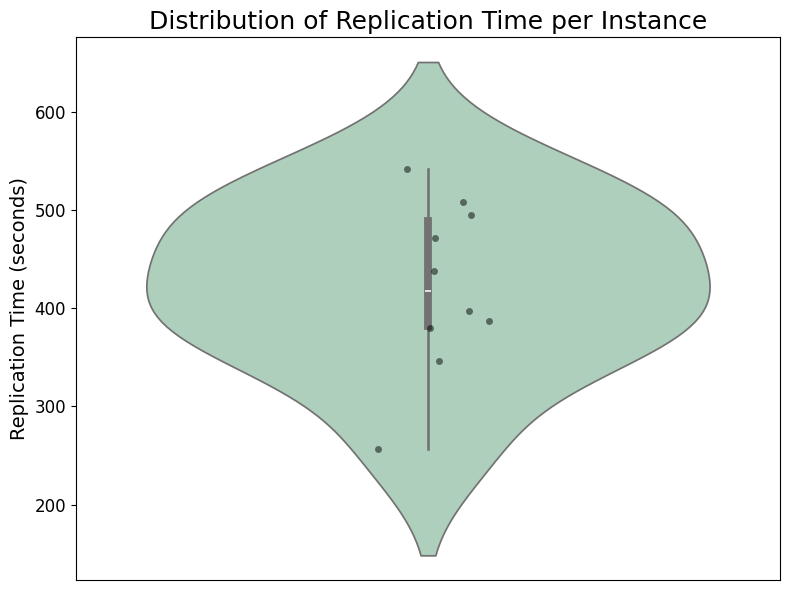

In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load CSV
# df = pd.read_csv("your_file.csv", sep='\t')  # adjust separator if needed

# Convert start and finish times to datetime
df['start_time_rep'] = pd.to_datetime(df['start_time_rep'])
df['finish_time_rep'] = pd.to_datetime(df['finish_time_rep'])

# Calculate duration in seconds
df['replication_time_sec'] = (df['finish_time_rep'] - df['start_time_rep']).dt.total_seconds()

# Optional: convert to minutes
# df['replication_time_min'] = df['replication_time_sec'] / 60

# Create violin plot for replication time
plt.figure(figsize=(8,6))
sns.violinplot(y='replication_time_sec', data=df, color='#A8D5BA')
sns.stripplot(y='replication_time_sec', data=df, color='k', alpha=0.5, jitter=True)

# Increase font size
plt.title('Distribution of Replication Time per Instance', fontsize=18)
plt.ylabel('Replication Time (seconds)', fontsize=14)
plt.xticks([])  # no x-axis needed
plt.yticks(fontsize=12)

plt.tight_layout()
plt.savefig("replication_time_distribution.pdf")
plt.show()


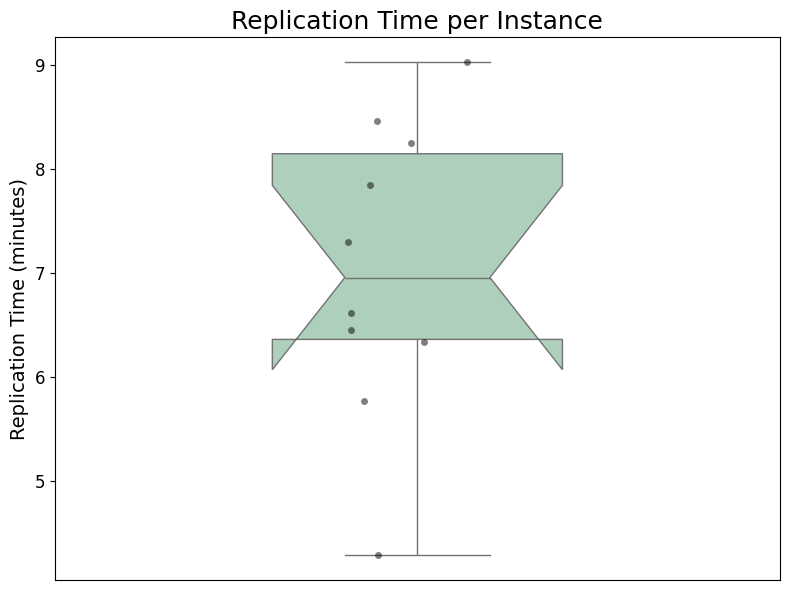

In [44]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load CSV
# df = pd.read_csv("your_file.csv", sep='\t')  # adjust separator if needed

# Convert start and finish times to datetime
df['start_time_rep'] = pd.to_datetime(df['start_time_rep'])
df['finish_time_rep'] = pd.to_datetime(df['finish_time_rep'])

# Calculate duration in minutes
df['replication_time_min'] = (df['finish_time_rep'] - df['start_time_rep']).dt.total_seconds() / 60

# Create notched boxplot
plt.figure(figsize=(8,6))
sns.boxplot(y='replication_time_min', data=df, color='#A8D5BA', notch=True, width=0.4)
sns.stripplot(y='replication_time_min', data=df, color='k', alpha=0.5, jitter=True)  # optional points

# Increase font size
plt.title('Replication Time per Instance', fontsize=18)
plt.ylabel('Replication Time (minutes)', fontsize=14)
plt.xticks([])  # no x-axis needed
plt.yticks(fontsize=12)

plt.tight_layout()
plt.savefig("replication_time_boxplot_min.pdf")
plt.show()


In [45]:
df.head()

,instance_id,instance_cost_org,tokens_sent_org,tokens_received_org,api_calls_org,patch_org,instance_cost_rep,tokens_sent_rep,tokens_received_rep,api_calls_rep,start_time_rep,finish_time_rep,patch_rep,replication_time_sec,replication_time_min
0,astropy__astropy-12907,0.900303,38214,1578,48,diff --git a/astropy/modeling/separable.py b/a...,0.600997,764258,1435,37,2025-10-20 19:34:28,2025-10-20 19:40:14,diff --git a/astropy/modeling/separable.py b/a...,346.0,5.766667
1,astropy__astropy-14182,0.713035,22600,1980,56,diff --git a/astropy/io/ascii/rst.py b/astropy...,0.596956,820716,2151,51,2025-10-20 18:26:41,2025-10-20 18:33:01,diff --git a/astropy/io/ascii/rst.py b/astropy...,380.0,6.333333
2,astropy__astropy-14995,0.990614,41812,1715,54,diff --git a/src/_pytest/_code/source.py b/src...,0.673011,955122,1759,45,2025-10-20 19:53:30,2025-10-20 20:00:48,diff --git a/astropy/nddata/mixins/ndarithmeti...,438.0,7.300000
3,django__django-10914,1.036511,32787,2500,53,diff --git a/django/conf/global_settings.py b/...,1.091795,1622481,1919,58,2025-10-20 20:09:40,2025-10-20 20:17:31,diff --git a/django/conf/global_settings.py b/...,471.0,7.850000
4,django__django-11099,1.191213,39296,2064,58,diff --git a/django/contrib/auth/validators.py...,0.962296,1520534,2290,58,2025-10-20 18:02:24,2025-10-20 18:10:52,diff --git a/django/contrib/auth/validators.py...,508.0,8.466667


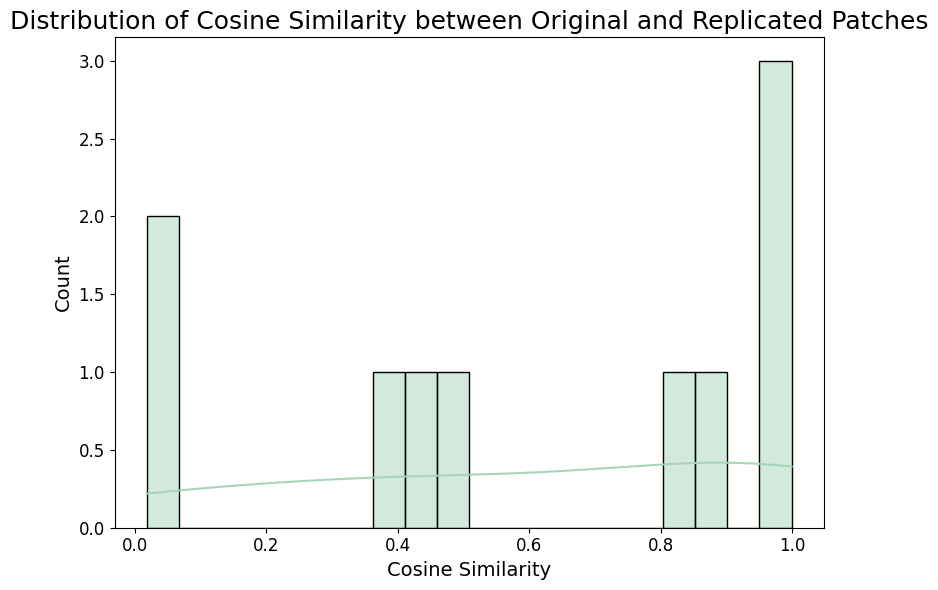

In [47]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns
import matplotlib.pyplot as plt

# Load CSV
# df = pd.read_csv("your_file.csv", sep='\t')  # adjust separator if needed

# Fill missing patches with empty strings if any
df['patch_org'] = df['patch_org'].fillna('')
df['patch_rep'] = df['patch_rep'].fillna('')

# Combine patches for TF-IDF vectorization
vectorizer = TfidfVectorizer()
# Fit on all patches (org + rep) to have consistent feature space
vectorizer.fit(df['patch_org'].tolist() + df['patch_rep'].tolist())

# Transform each patch
org_vectors = vectorizer.transform(df['patch_org'])
rep_vectors = vectorizer.transform(df['patch_rep'])

# Compute cosine similarity for each instance
df['cosine_similarity'] = [cosine_similarity(org_vectors[i], rep_vectors[i])[0][0] for i in range(len(df))]

# Plot distribution
plt.figure(figsize=(8,6))
sns.histplot(df['cosine_similarity'], bins=20, kde=True, color='#A8D5BA')
plt.title('Distribution of Cosine Similarity between Original and Replicated Patches', fontsize=18)
plt.xlabel('Cosine Similarity', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.savefig("patch_cosine_similarity_distribution.pdf")
plt.show()


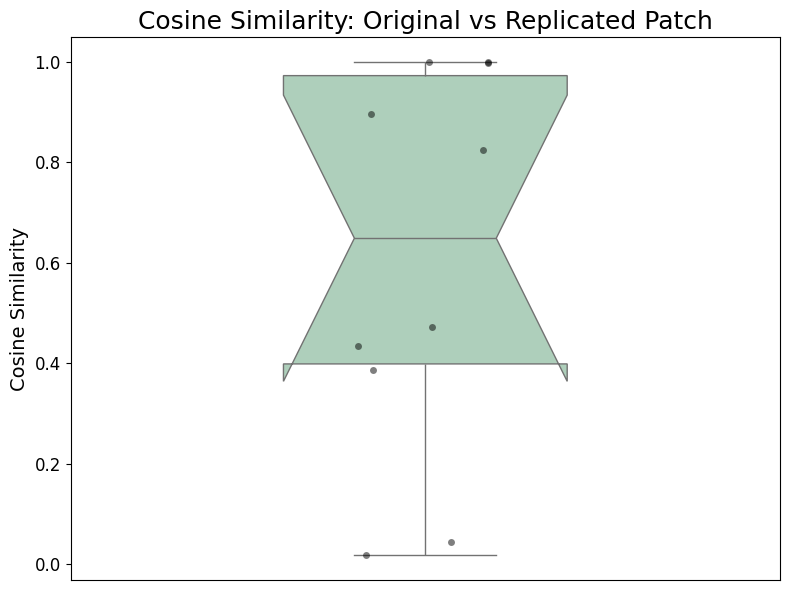

In [53]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns
import matplotlib.pyplot as plt

# Load CSV
# df = pd.read_csv("your_file.csv", sep='\t')  # adjust separator if needed

# Fill missing patches
df['patch_org'] = df['patch_org'].fillna('')
df['patch_rep'] = df['patch_rep'].fillna('')

# TF-IDF vectorization
vectorizer = TfidfVectorizer()
vectorizer.fit(df['patch_org'].tolist() + df['patch_rep'].tolist())
org_vectors = vectorizer.transform(df['patch_org'])
rep_vectors = vectorizer.transform(df['patch_rep'])

# Cosine similarity
df['cosine_similarity'] = [cosine_similarity(org_vectors[i], rep_vectors[i])[0][0] for i in range(len(df))]

# -------------------------------
# Option 1: Violin plot
# plt.figure(figsize=(8,6))
# sns.violinplot(y='cosine_similarity', data=df, color='#A8D5BA', inner='box')
# sns.stripplot(y='cosine_similarity', data=df, color='k', alpha=0.5, jitter=True)

# plt.title('Cosine Similarity: Original vs Replicated Patch', fontsize=18)
# plt.ylabel('Cosine Similarity', fontsize=14)
# plt.xticks([])  # no x-axis needed
# plt.yticks(fontsize=12)
# plt.tight_layout()
# plt.savefig("patch_cosine_similarity_violin.pdf")
# plt.show()

# -------------------------------
# Option 2: Boxplot
plt.figure(figsize=(8,6))
sns.boxplot(y='cosine_similarity', data=df, color='#A8D5BA', notch=True, width=0.4)
sns.stripplot(y='cosine_similarity', data=df, color='k', alpha=0.5, jitter=True)

plt.title('Cosine Similarity: Original vs Replicated Patch', fontsize=18)
plt.ylabel('Cosine Similarity', fontsize=14)
plt.xticks([])  # no x-axis needed
plt.yticks(fontsize=12)
plt.tight_layout()
plt.savefig("patch_cosine_similarity_boxplot.pdf")
plt.show()


In [52]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Load CSV
# df = pd.read_csv("your_file.csv", sep='\t')

# Fill missing patches
df['patch_org'] = df['patch_org'].fillna('')
df['patch_rep'] = df['patch_rep'].fillna('')

# TF-IDF vectorization
vectorizer = TfidfVectorizer()
vectorizer.fit(df['patch_org'].tolist() + df['patch_rep'].tolist())
org_vectors = vectorizer.transform(df['patch_org'])
rep_vectors = vectorizer.transform(df['patch_rep'])

# Cosine similarity
df['cosine_similarity'] = [cosine_similarity(org_vectors[i], rep_vectors[i])[0][0] for i in range(len(df))]

# Create table for each instance
instance_table = df[['instance_id', 'cosine_similarity']].copy()
instance_table['cosine_similarity'] = instance_table['cosine_similarity'].round(3)  # round for readability

# Display table
print(instance_table)

# Optionally, save as CSV or Excel
instance_table.to_csv("cosine_similarity_per_instance.csv", index=False)
instance_table.to_excel("cosine_similarity_per_instance.xlsx", index=False)


                        instance_id  cosine_similarity
0            astropy__astropy-12907              0.387
1            astropy__astropy-14182              0.825
2            astropy__astropy-14995              0.018
3              django__django-10914              0.998
4              django__django-11099              0.998
5              django__django-11133              0.473
6      matplotlib__matplotlib-24970              0.999
7           pytest-dev__pytest-7432              0.895
8  scikit-learn__scikit-learn-10297              0.044
9                sympy__sympy-12419              0.434
